<h3> Study the data </h3>
1. Problem Analysis
2. Dependent variable ('SalePrice') study
3. Multivariate study. 
4. Data preprocessing
5. Data standarization
5. Modeling with and without regularization

In [104]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler


In [105]:
#Loading the training and test data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#What are my columns
print(df_train.columns)

#How many rows and columns
print((df_train.shape))

#How does my data look?
print(df_train.head())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
# Check for duplicates in the Id column
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")


There are 0 duplicate IDs for 1460 total entries


<h3>Analyze the dependent variable 'SalePrice'</h3>

In [107]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

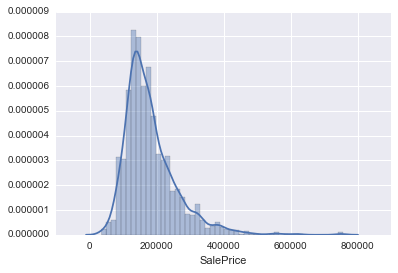

In [108]:
import warnings
warnings.filterwarnings('ignore')

#Plot the distribution histogram
sns.distplot(df_train['SalePrice']);

Skewness<br>
Skewness is the measure of data symmetry or more precisely lack of symmetry.
A truly symmetrical data set has a skewness equal to 0. A positive skewness means that the distribution has a right-handed tail.
So, when is the skewness too much?  The rule of thumb seems to be:

<ul>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical</ul>
<ul>If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed</ul>
<ul>If the skewness is less than -1 or greater than 1, the data are highly skewed</ul>

Kurtosis<br>
Kurtosis is indictor if the distribution is heavy-tailed or light-tailed<br>
The kurtosis decreases as the tails become lighter.  It increases as the tails become heavier.



In [109]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h3>Independent Variables and the correlation Matrix</h3>

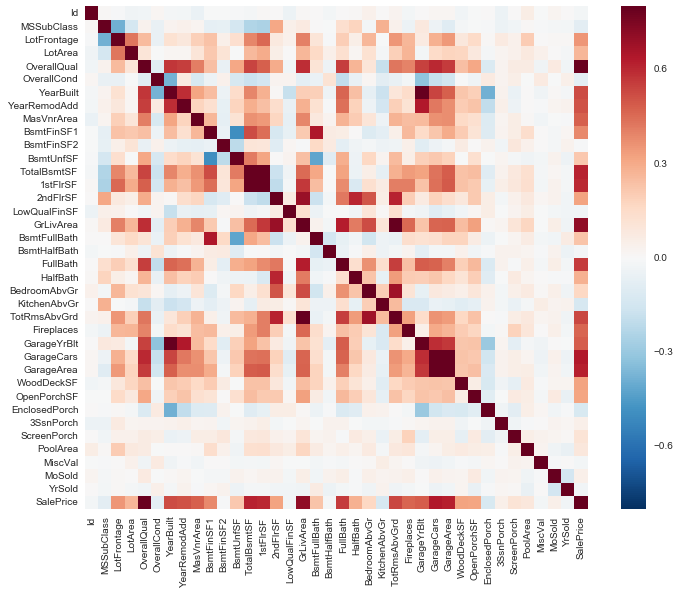

In [110]:
#Correlation Matrix
corrmat=df_train.corr()
#print(corrmat)
f, ax = plt.subplots(figsize=(12, 9)) #this line make the plot bigger and clearer
sns.heatmap(corrmat, vmax=.8, square=True);

<b>Analysis of the correlation matrix: </b>
1. We observe strong correlation between TotalBsmtSF and 1stFlrSF. Similar correlation between GarageCars and GarageArea.And for GarageYrBlt and YearBlt...etc. This might be something to consider during Feature Selection as they seem to give almost the same information.
2. Another observation to make is the strong correlation of OverallQual, GrLivArea, GarageCars,FullBath,YearBlt, and TotalBsmtSF with the SalePrice variable. We can go ahead and plot these variable w.r.t. the SalePrice to see how well they relate.


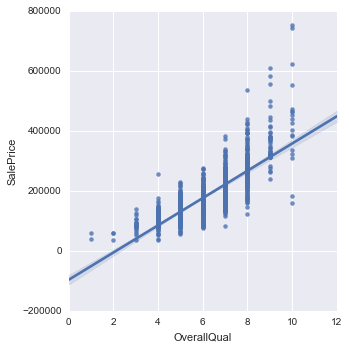

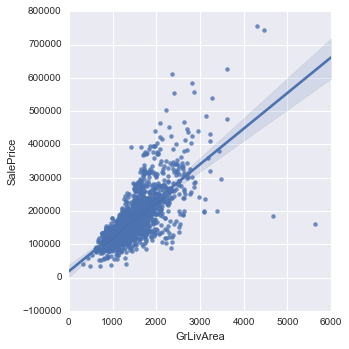

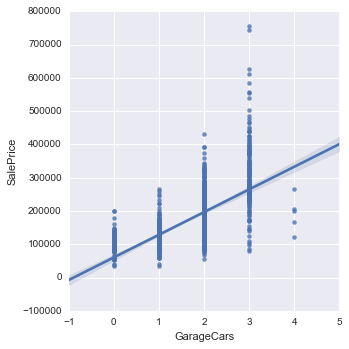

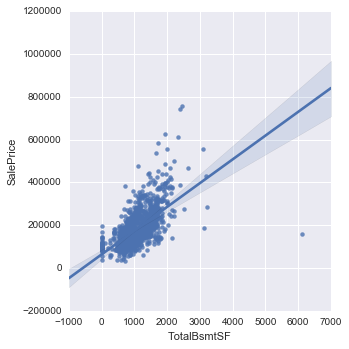

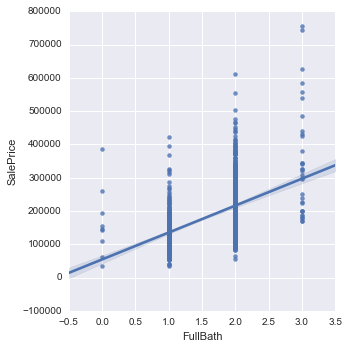

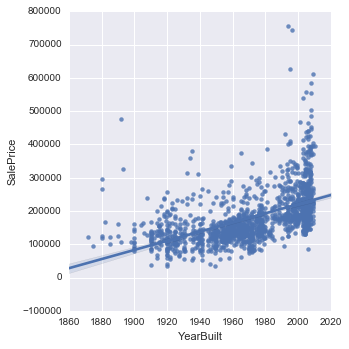

In [111]:
#scatterplot for variable strongly correlated with the SalePrice
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for col in cols:
    sns.lmplot( col,'SalePrice',
           data=df_train)
plt.show();

In [112]:
all_data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],
                      df_test.loc[:,'MSSubClass':'SaleCondition'])) #all except the ID column and the SalePrice column

In [113]:
all_data.shape

(2919, 79)

<h3>Data Preprocessing</h3>

In [114]:
#null values in the data
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Let's analyse this to understand how to handle the missing data.<br>
We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). <br>
Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

Finally, we have one missing observation in other columns. We will replace these with mean of that column<br>
In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.
After we delete columns with massive nulls,
#1. See if any categorical data is presented in numeric form
#2. If yes, change them to categorical form
#3. Take all the numerical columns with null and replace them with the mean
#4. Get dummies for the categorical columns

In [115]:
#dealing with missing data - delete columns with massive nulls,
all_data = all_data.drop((missing_data[missing_data['Total'] > 440]).index,1) #Deleting the columns with >15% of nulls.
all_data.shape

(2919, 73)

In [116]:
#2. Some numerical features are actually really categories
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [117]:
#3. Take all the numerical columns with null and replace them with the mean
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(numeric_feats)
#filling NA's with the mean of the column:
all_data[numeric_feats] = all_data[numeric_feats].fillna(all_data.median())


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')


In [118]:
#4. Get dummies for the categorical columns
all_data = pd.get_dummies(all_data)

In [119]:
all_data.shape

(2919, 295)

In [120]:
#null values in the data
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition_Partial,0,0.0
Condition2_Feedr,0,0.0
Neighborhood_Sawyer,0,0.0
Neighborhood_SawyerW,0,0.0
Neighborhood_Somerst,0,0.0
Neighborhood_StoneBr,0,0.0
Neighborhood_Timber,0,0.0
Neighborhood_Veenker,0,0.0
Condition1_Artery,0,0.0
Condition1_Feedr,0,0.0


In [121]:
#creating matrices for sklearn:
train = all_data[:df_train.shape[0]]
test = all_data[df_train.shape[0]:]
target = df_train.SalePrice


In [122]:
print(np.isnan(X_train.any()).sum()) #and gets False
print(np.isfinite(X_train.all()).sum()) #and gets True

0
296


In [123]:
#log transform the target:
target = np.log1p(target)

<h3> Modeling </h3>

<b>Split and Standarization of the data</b>

In [124]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score #MSE and Coefficient of determination


In [139]:
#split train-test for cv
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=.3,random_state=0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 295)
X_test : (438, 295)
y_train : (1022,)
y_test : (438,)


In [126]:
#Once the split is done, it's time for standarizing the numerical variables...this cannot be done before as we don't want to fit the StandardScaler on some observations that will later be used in the test set.
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])

<b>1. Linear Regression without Regularization</b>

In [127]:
slr=LinearRegression()
slr.fit(X_train,y_train)
y_train_pred= slr.predict(X_train)
y_test_pred= slr.predict(X_test)

In [131]:
#print(slr.intercept_)
#print(slr.coef_)


In [128]:
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train: 0.007, test: 19963794831244456.000


Summary - This looks like a classic case of overfitting and the regularization should be able to help the results.

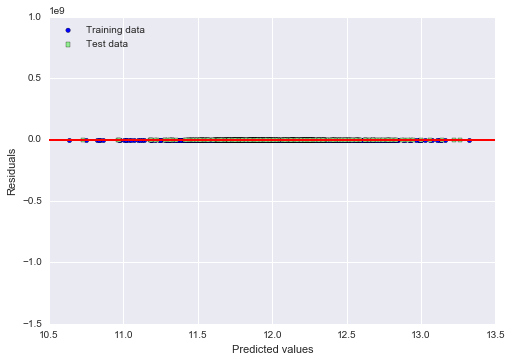

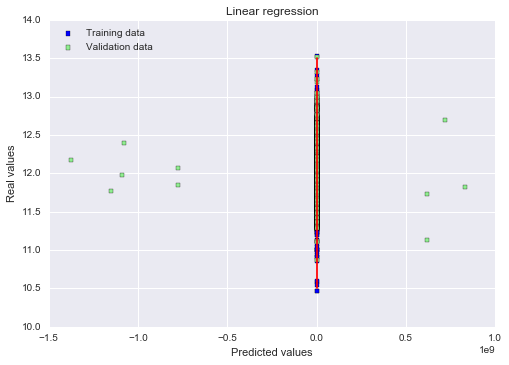

In [138]:
# Plot residuals
res_train = y_train_pred-y_train
res_test = y_test_pred-y_test
plt.scatter(y_train_pred,res_train, c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,res_test, c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=10.5,xmax=13.5,lw=2,color='red')
plt.xlim([10.5,13.5])
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

<b>2. Linear Regression with Lasso (L1 penalty) Regularization</b><br>
(number of features >> number of examples, which explains the choice..

Best alpha : 0.0003
Try again for more precision with alphas centered around 0.0003
Best alpha : 0.00039
MSE train: 0.009, test: 0.032


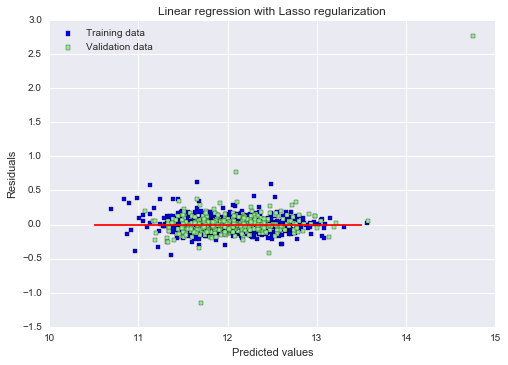

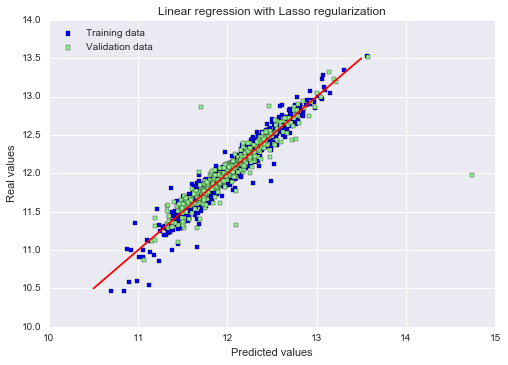

Lasso picked 132 features and eliminated the other 163 features


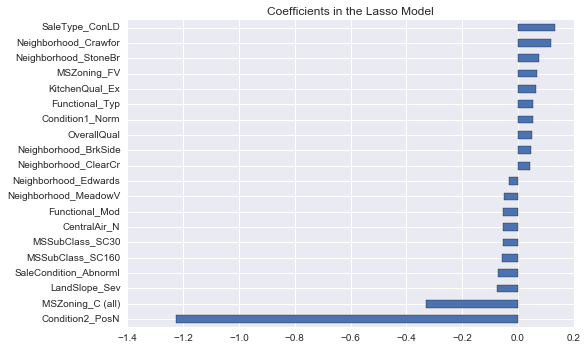

In [140]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_las),mean_squared_error(y_test,y_test_las)))

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [141]:
y_finaltest_las = lasso.predict(test)

In [146]:
print(df_test.ix[:,0])

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, dtype: int64
